In [1]:
# Common imports
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import Imputer
import datetime
from scipy import sparse
from scipy.sparse import hstack, csr_matrix

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = ""
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
import pandas as pd
train_data = pd.read_csv("./data/data_train.csv")
test_data = pd.read_csv("./data/data_test.csv")

In [3]:
(train_data.shape, test_data.shape)

((307511, 372), (48744, 372))

In [4]:
train_data

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF,cc_bal_NAME_CONTRACT_STATUS_Active,cc_bal_NAME_CONTRACT_STATUS_Approved,cc_bal_NAME_CONTRACT_STATUS_Completed,cc_bal_NAME_CONTRACT_STATUS_Demand,cc_bal_NAME_CONTRACT_STATUS_Refused,cc_bal_NAME_CONTRACT_STATUS_Sent proposal,cc_bal_NAME_CONTRACT_STATUS_Signed
0,24700.5,406597.5,351000.0,202500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35698.5,1293502.5,1129500.0,270000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6750.0,135000.0,135000.0,67500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,21865.5,513000.0,513000.0,121500.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,27517.5,490495.5,454500.0,99000.000,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,41301.0,1560726.0,1395000.0,171000.000,0.0,0.0,1.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,42075.0,1530000.0,1530000.0,360000.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,33826.5,1019610.0,913500.0,112500.000,0.0,0.0,0.0,0.0,0.0,1.0,...,25.767123,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
9,20250.0,405000.0,405000.0,135000.000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
list(train_data.columns)

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT

In [4]:
ignore_features = ['SK_ID_CURR',
                   'TARGET',
                   'REG_REGION_NOT_LIVE_REGION',
                   'p_NAME_PORTFOLIO_Cars',
                   'b_CREDIT_CURRENCY_currency 1',
                   'b_CREDIT_ACTIVE_Bad debt',
                   'p_PRODUCT_COMBINATION_POS others without interest',
                   'p_NAME_SELLER_INDUSTRY_Tourism',
                'p_NAME_SELLER_INDUSTRY_Jewelry',
                'p_CHANNEL_TYPE_Car dealer',
                'p_NAME_GOODS_CATEGORY_Other',
                'p_NAME_GOODS_CATEGORY_Weapon',
                'b_CREDIT_CURRENCY_currency 3',
                'p_NAME_GOODS_CATEGORY_Insurance',
                'p_NAME_GOODS_CATEGORY_House Construction',
                'p_NAME_GOODS_CATEGORY_Homewares',
                'p_NAME_GOODS_CATEGORY_Fitness',
                'p_NAME_GOODS_CATEGORY_Education',
                'p_NAME_GOODS_CATEGORY_Direct Sales',
                'b_CREDIT_CURRENCY_currency 2',
                'b_CREDIT_CURRENCY_currency 4',
                'p_NAME_GOODS_CATEGORY_Additional Service',
                'NAME_CONTRACT_STATUS_Amortized debt',
                'cc_bal_NAME_CONTRACT_STATUS_Refused',
                'cc_bal_NAME_CONTRACT_STATUS_Demand',
                'cc_bal_NAME_CONTRACT_STATUS_Approved',
                'NAME_CONTRACT_STATUS_XNA',
                'AMT_REQ_CREDIT_BUREAU_HOUR',
                'NAME_CONTRACT_STATUS_Demand',
                'NAME_CONTRACT_STATUS_Canceled',
                'b_CREDIT_TYPE_Unknown type of loan',
                'b_CREDIT_TYPE_Cash loan (non-earmarked,',
                'b_CREDIT_TYPE_Real estate loan',
                'b_CREDIT_TYPE_Mobile operator loan',
                'b_CREDIT_TYPE_Loan for working capital replenishment',
                'b_CREDIT_TYPE_Loan for the purchase of equipment',
                'b_CREDIT_TYPE_Loan for purchase of shares (margin lending,',
                'b_CREDIT_TYPE_Loan for business development',
                'b_CREDIT_TYPE_Interbank credit',
                'p_NAME_GOODS_CATEGORY_Animals',
                'FLAG_DOCUMENT_10',
                'REG_REGION_NOT_WORK_REGION',
                'p_NAME_CASH_LOAN_PURPOSE_Buying a new car',
                'FLAG_MOBIL',
                'p_NAME_CASH_LOAN_PURPOSE_Money for a third person',
                'p_NAME_CASH_LOAN_PURPOSE_Journey',
                'p_NAME_CASH_LOAN_PURPOSE_Hobby',
                'p_NAME_CASH_LOAN_PURPOSE_Gasification / water supply',
                'p_NAME_CASH_LOAN_PURPOSE_Furniture',
                'p_NAME_CASH_LOAN_PURPOSE_Education',
                'p_NAME_CASH_LOAN_PURPOSE_Buying a home',
                'p_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment',
                'p_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land',
                'p_NAME_CASH_LOAN_PURPOSE_Buying a garage',
                'p_NAME_CASH_LOAN_PURPOSE_Business development',
                'p_NAME_CASH_LOAN_PURPOSE_Building a house or an annex',
                'p_NAME_CONTRACT_TYPE_XNA',
                'p_RATE_INTEREST_PRIMARY',
                'p_NFLAG_LAST_APPL_IN_DAY',
                'FLAG_EMP_PHONE',
                'FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_11',
                'FLAG_DOCUMENT_19',
                'FLAG_DOCUMENT_12',
                'p_NAME_CLIENT_TYPE_XNA',
                'FLAG_DOCUMENT_14',
                'p_NAME_TYPE_SUITE_Group of people',
                'p_CODE_REJECT_REASON_SYSTEM',
                'FLAG_DOCUMENT_17',
                'p_CODE_REJECT_REASON_CLIENT',
                'FLAG_DOCUMENT_2',
                'p_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal',
                'FLAG_DOCUMENT_20',
                'FLAG_DOCUMENT_21',
                'p_NAME_PAYMENT_TYPE_Cashless from the account of the employer',
                'FLAG_DOCUMENT_4',
                'FLAG_DOCUMENT_5',
                'p_NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday',
                'FLAG_DOCUMENT_7',
                'cc_bal_NAME_CONTRACT_STATUS_Signed'
                  ]

relevant_features = [col for col in train_data.columns if col not in ignore_features]
relevant_features

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_EMAIL',
 'FLAG_OWN_CA

In [5]:
X_full = train_data[relevant_features].values
X_test = test_data[relevant_features].values

Median imputation for the moment:

In [6]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X_full)

# Transform both training and testing data
X_full = imputer.transform(X_full)
X_test = imputer.transform(X_test)

# Repeat with the scaler
scaler.fit(X_full)
X_full = scaler.transform(X_full)
X_test = scaler.transform(X_test)

print('Training data shape: ', X_full.shape)
print('Testing data shape: ', X_test.shape)

('Training data shape: ', (307511, 294))
('Testing data shape: ', (48744, 294))


In [7]:
from sklearn.model_selection import train_test_split

# Split stratified to conserve label proportions in train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_full, train_data['TARGET'],
                                                    stratify = train_data['TARGET'], 
                                                    test_size=0.20)

In [8]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

((246008, 294), (246008,), (61503, 294), (61503,))


In [9]:
X_train

array([[0.04513865, 0.04557303, 0.03479237, ..., 1.        , 0.        ,
        0.        ],
       [0.04477009, 0.02914607, 0.02356902, ..., 1.        , 0.        ,
        0.        ],
       [0.09629695, 0.17074831, 0.12794613, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.08922429, 0.0502764 , 0.04826038, ..., 1.        , 0.        ,
        0.        ],
       [0.09861355, 0.19101124, 0.19191919, ..., 1.        , 0.        ,
        0.        ],
       [0.1023517 , 0.25124719, 0.20875421, ..., 1.        , 0.        ,
        0.        ]])

In [10]:
y_train

181648    0.0
229245    0.0
122525    1.0
306311    1.0
300658    0.0
201033    0.0
86445     0.0
225267    0.0
42927     0.0
240820    0.0
193691    0.0
190669    0.0
270875    0.0
97464     0.0
283993    0.0
23750     0.0
124306    0.0
28423     0.0
252183    0.0
39941     0.0
115584    0.0
29456     0.0
37475     0.0
148624    0.0
264008    0.0
279203    0.0
108065    0.0
115746    0.0
247351    1.0
246       1.0
         ... 
60759     0.0
234644    0.0
3487      0.0
88178     0.0
128969    0.0
30712     0.0
279566    1.0
26201     0.0
203798    0.0
177502    0.0
23286     1.0
70057     0.0
258456    0.0
163675    0.0
148573    0.0
304722    0.0
288987    0.0
232332    0.0
58959     0.0
234985    0.0
282761    0.0
269123    0.0
255356    0.0
222225    1.0
170183    0.0
31304     0.0
121193    0.0
248504    0.0
175469    1.0
285162    0.0
Name: TARGET, Length: 246008, dtype: float64

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_predict
import lightgbm
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [ ]:
classifiers = {
    'LGB' : LGBMClassifier(boosting_type='gbdt',
                           objective='binary',
                           n_estimators = 2500,
                           learning_rate = 0.05,
                           max_depth = 10,
                           min_data_in_leaf = 200),
    #'XGB' : XGBClassifier(learning_rate = 0.1, n_estimators = 300, max_depth = 7),
    #'RFC' : RandomForestClassifier(n_estimators = 500, 
    #                               min_samples_split = 100,
    #                               min_samples_leaf = 70,
    #                               max_depth = 20,
    #                               max_features = 40
    #                              ),
    
    
    #'KNN' : KNeighborsClassifier(n_neighbors = 200, p=1),
    #'LogisticRegression' : LogisticRegression(C=0.01, penalty = 'l1'),    
    #'SVC' : SVC(probability=True,max_iter=100),
    #'GNB' : GaussianNB(),
    #'MLP' : MLPClassifier(),

    #'DTC' : DecisionTreeClassifier(),
    
}

    
fpr={}
tpr={}

for i,c in classifiers.items():
    print ('fitting -- ', i ,) 
    score = cross_val_score(c, X_train, y_train, cv=5, scoring="roc_auc",n_jobs=1)
    c.fit(X_train, y_train)
    y_pred = c.predict_proba(X_val)[:, 1]
    fpr[i],tpr[i], _ = roc_curve(y_val, y_pred)
    print (i, score)

('fitting -- ', 'LGB')


### Previous trainings

All data baseline

'LGB' : LGBMClassifier(boosting_type='gbdt',
                           objective='binary',
                           n_estimators = 500,
                           learning_rate = 0.05,
                           max_depth = 10,
                           min_data_in_leaf = 200),
                           
('fitting -- ', 'LGB')
('LGB', array([0.78014746, 0.76825745, 0.77936702, 0.77609607, 0.78070741]))


Without less important features and 2500 estimators:

('Saving figure', '2-roc_curve-lgb-alldata')


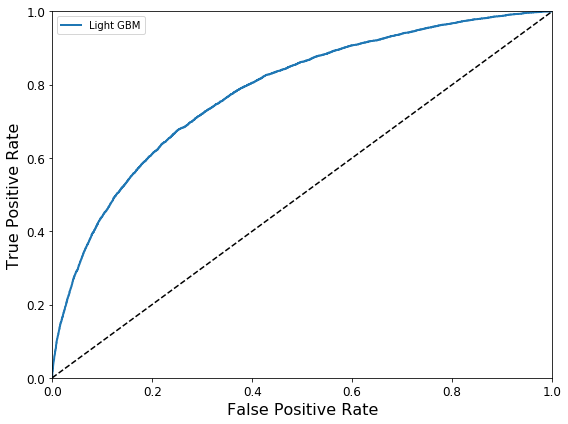

In [15]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

plt.figure(figsize=(8, 6))
#plot_roc_curve(fpr["KNN"], tpr["KNN"], label="K Nearest Neighbors")
#plot_roc_curve(fpr["GNB"], tpr["GNB"], label="Gaussian Naive Bayes")
#plot_roc_curve(fpr["MLP"], tpr["MLP"], label="Multi Layer Perceptron")
plot_roc_curve(fpr["LGB"], tpr["LGB"], label="Light GBM")
#plot_roc_curve(fpr["SVC"], tpr["SVC"], label="Support Vectors")
#plot_roc_curve(fpr["XGB"], tpr["XGB"], label="XGradient Boost")
#plot_roc_curve(fpr["DTC"], tpr["DTC"], label="Decision Tree")
#plot_roc_curve(fpr["RFC"], tpr["RFC"], label="Random forest")
#plot_roc_curve(fpr["LogisticRegression"], tpr["LogisticRegression"], label="LogisticRegression")
save_fig("2-roc_curve-lgb-alldata")
plt.show()

## Feature importance

Feature ranking:
('1. feature 37 (522.000000)', 'EXT_SOURCE_2')
('2. feature 36 (516.000000)', 'EXT_SOURCE_1')
('3. feature 38 (507.000000)', 'EXT_SOURCE_3')
('4. feature 22 (419.000000)', 'DAYS_BIRTH')
('5. feature 0 (326.000000)', 'AMT_ANNUITY')
('6. feature 1 (293.000000)', 'AMT_CREDIT')
('7. feature 23 (275.000000)', 'DAYS_EMPLOYED')
('8. feature 326 (249.000000)', 'i_AMT_PAYMENT')
('9. feature 330 (243.000000)', 'CNT_INSTALMENT_FUTURE')
('10. feature 24 (213.000000)', 'DAYS_ID_PUBLISH')
('11. feature 133 (209.000000)', 'p_CNT_PAYMENT')
('12. feature 291 (201.000000)', 'b_AMT_CREDIT_SUM_DEBT')
('13. feature 2 (192.000000)', 'AMT_GOODS_PRICE')
('14. feature 26 (189.000000)', 'DAYS_REGISTRATION')
('15. feature 290 (184.000000)', 'b_AMT_CREDIT_SUM')
('16. feature 327 (176.000000)', 'SK_ID_PREV')
('17. feature 121 (175.000000)', 'p_AMT_ANNUITY')
('18. feature 283 (171.000000)', 'b_SK_ID_BUREAU')
('19. feature 356 (164.000000)', 'cc_bal_CNT_DRAWINGS_ATM_CURRENT')
('20. feature 102 (156.

('Saving figure', '2-features')


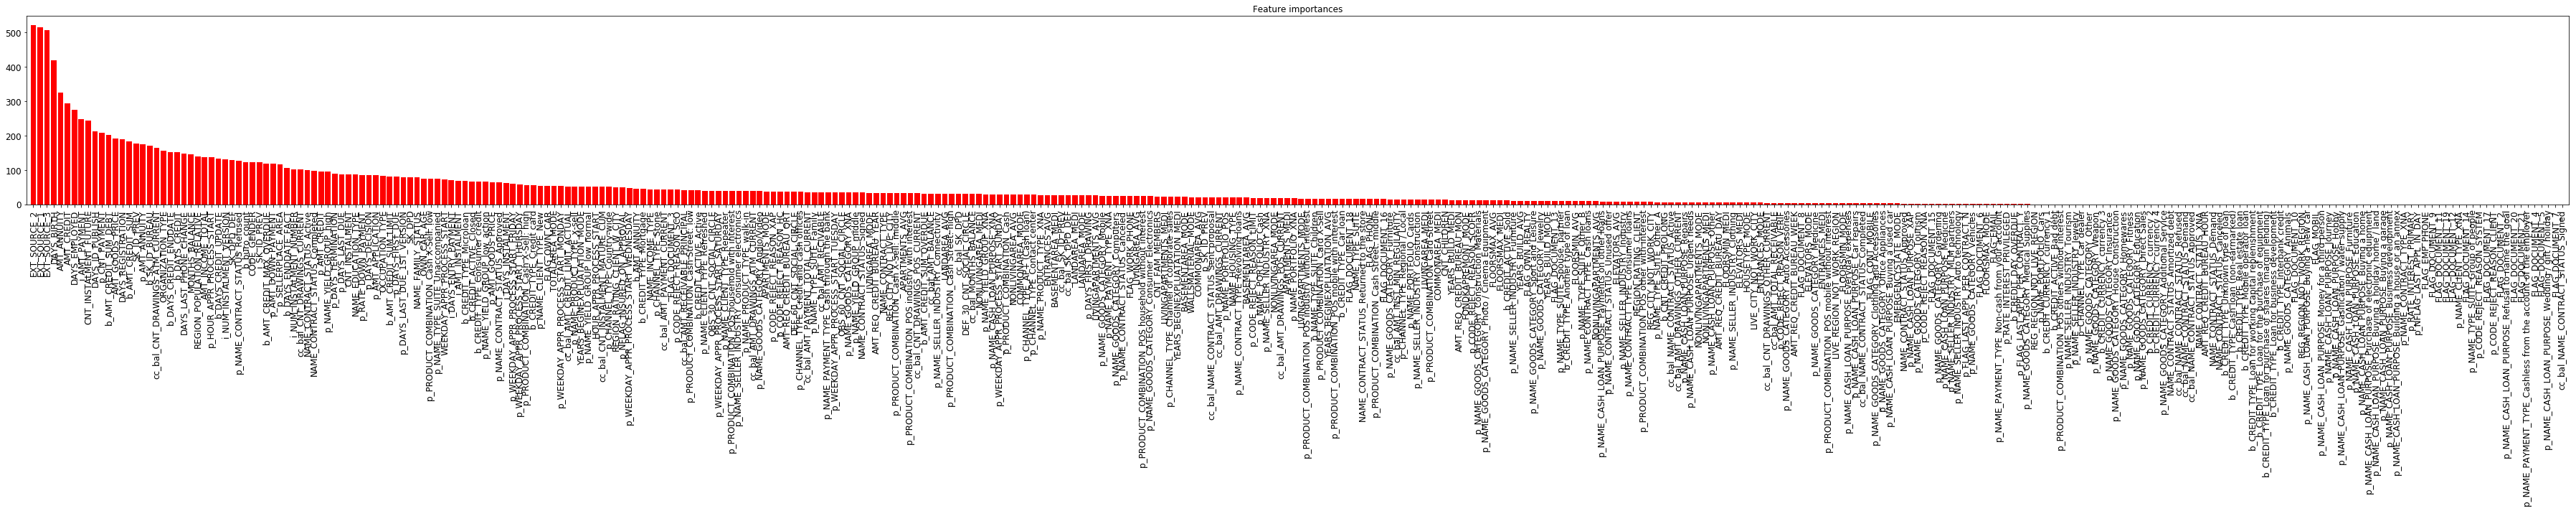

In [23]:
importances = classifiers["LGB"].feature_importances_
indices = np.argsort(importances)[::-1]
   
# Print the feature ranking
features_arranged = [relevant_features[i] for i in indices]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), relevant_features[indices[f]])

# Plot the feature importances of the forest
plt.figure(figsize=(50, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), features_arranged, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
save_fig("2-features")
plt.show()

## Optimization

## Kaggle submission file

In [16]:
list(test_data.columns)

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT

In [17]:
preds = classifiers['LGB'].predict_proba(X_test)[:,1]
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_data['SK_ID_CURR']
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("lgb_only_app_baseline_allfiles.csv", index=False)
sub_lgb.head(100)

,SK_ID_CURR,TARGET
0,100001,0.029417
1,100005,0.137994
2,100013,0.017783
3,100028,0.029893
4,100038,0.135547
5,100042,0.073428
6,100057,0.010260
7,100065,0.026539
8,100066,0.013988
9,100067,0.074667


In [18]:
sub_lgb['TARGET'].mean()

0.0748667394224517

In [19]:
sub_lgb.shape

(48744, 2)